<a href="https://colab.research.google.com/github/Ayanlola2002/Analyticsvidyah/blob/master/club_mahindra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#load important libraries
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt      
import warnings

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('train_5CLrC8b.zip')

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('test_Jwt0MQH.zip')

In [0]:
# reading the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# getting the shapes of the datasets
print("Shape of Train :", train_data.shape)
print("Shape of Test :", test_data.shape)

Shape of Train : (341424, 24)
Shape of Test : (146765, 23)


In [6]:
# lets look at the head of the train

train_data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [0]:
#copy of original dataset
df_train = train_data.copy()
df_test = test_data.copy()

In [0]:
#save id column
train_id = train_data['reservation_id']
test_id = test_data['reservation_id']

In [0]:
#Now drop the  'reservation id' colum since it's unnecessary for  the prediction process.
df_train.drop("reservation_id", axis = 1, inplace = True)
df_test.drop("reservation_id", axis = 1, inplace = True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 23 columns):
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  336660 non-null float64
state_code_resort                     3414

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 22 columns):
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
persontravellingid          146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146730 non-null float64
state_code_residence        144505 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146765 non-null object
booking_type_code           146

In [0]:
target = df_train['amount_spent_per_room_night_scaled']  #target variable

#df_train['training_set'] = True #assing an extra variable to training and testing dataset before joining them
#df_test['training_set'] = False
#df_full = pd.concat([df_train, df_test]) #concatenate both dataframes prior to E

In [0]:
df_train = df_train.drop('amount_spent_per_room_night_scaled', axis=1) #drop target variable from training dataset

In [16]:
df_train.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],
      dtype='object')

In [17]:
df_train.isnull().sum()

booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code        114
state_code_residence        4764
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [18]:
# let's see if there are any missing values (i.e. NA)
print("There are {} NA values in 'amount_spent_per_room_night_scaled'".format(target.isnull().values.sum()))

There are 0 NA values in 'amount_spent_per_room_night_scaled'


Target varriable analysis

In [0]:
# let's get some stats on the 'target' variable
minimum_amount_spent_per_room = np.min(target)
maximum_amount_spent_room = np.max(target)
mean_amount_spent_per_room = np.mean(target)
median_amount_spent_per_room = np.median(target)
std_amount_spent_per_room = np.std(target)

In [0]:
# Show the calculated statistics
print("Statistics for the supplied house prices training dataset:")
print("Minimum price: ${:,.2f}".format(minimum_amount_spent_per_room))
print("Maximum price: ${:,.2f}".format(maximum_amount_spent_room))
print("Mean price: ${:,.2f}".format(mean_amount_spent_per_room))
print("Median price ${:,.2f}".format(median_amount_spent_per_room))
print("Standard deviation of prices: ${:,.2f}".format(std_amount_spent_per_room))

Statistics for the supplied house prices training dataset:
Minimum price: $1.60
Maximum price: $10.82
Mean price: $7.72
Median price $7.86
Standard deviation of prices: $1.09


In [20]:
target.describe()

count    341424.000000
mean          7.720801
std           1.090109
min           1.600397
25%           7.187260
50%           7.860814
75%           8.419144
max          10.816652
Name: amount_spent_per_room_night_scaled, dtype: float64

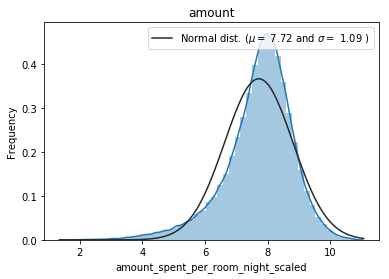

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew



# let's plot a histogram with the fitted parameters used by the function
sns.distplot(target , fit=norm);
# get mean and standard deviation
(mu, sigma) = norm.fit(target)
# add legends to the plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount');

In [22]:
print("Skewness: %f" % target.skew())

Skewness: -0.923229


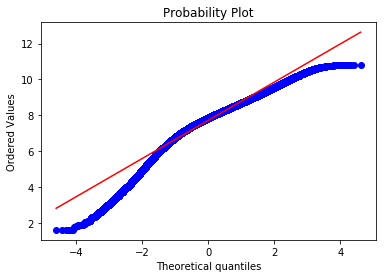

In [23]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()


 mu = 1.97 and sigma = 0.10



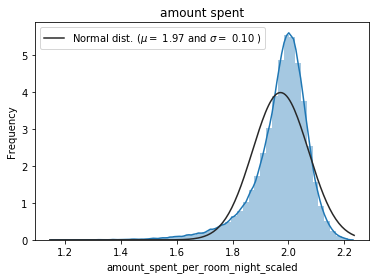

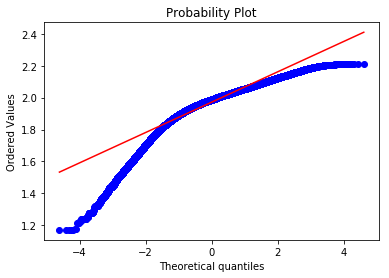

In [24]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
target_cube = np.power(target,1/3)

#Check the new distribution 
sns.distplot(target_cube , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target_cube)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount spent')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target_cube, plot=plt)
plt.show()

In [25]:
#plotting boxplot of target varriable
target.value_counts()
#train['Loan_Status'].value_counts().plot.bar()

8.339936     259
6.892235     207
6.199088     194
8.148104     192
7.993357     163
5.107157     162
7.827839     150
5.793623     133
7.646788     132
7.524189     117
7.454957     114
8.217336     114
7.727755     109
7.300209     104
4.414010     102
8.553566     101
7.422374      95
9.033083      87
5.800304      86
7.134692      86
8.398817      86
5.126936      83
5.820083      83
8.052255      83
8.014058      82
8.038351      82
5.895614      80
8.186771      80
6.382526      78
8.841249      78
            ... 
6.365536       1
8.158179       1
6.228603       1
7.958968       1
8.253465       1
7.940212       1
10.235353      1
7.688377       1
6.954604       1
7.447984       1
8.006105       1
9.935755       1
9.506918       1
8.757005       1
6.246890       1
7.924710       1
7.612291       1
8.050793       1
8.059488       1
8.100604       1
8.261577       1
7.894248       1
7.976132       1
6.897382       1
7.020816       1
7.741720       1
5.427458       1
7.888268      

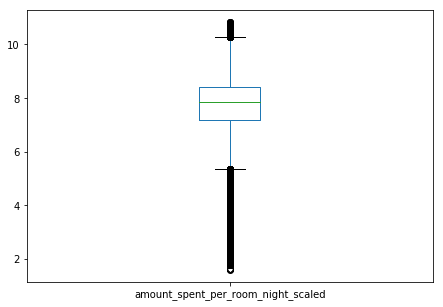

In [26]:
plt.subplot(121) 
target.plot.box(figsize=(16,5)) 
plt.show()

In [0]:
plt.subplot(122) 
df_train['channel_code'].plot.bar() 
plt.show()



KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f368d152c80> (for post_execute):


KeyboardInterrupt: ignored

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 22 columns):
booking_date                341424 non-null object
checkin_date                341424 non-null object
checkout_date               341424 non-null object
channel_code                341424 non-null int64
main_product_code           341424 non-null int64
numberofadults              341424 non-null int64
numberofchildren            341424 non-null int64
persontravellingid          341424 non-null int64
resort_region_code          341424 non-null int64
resort_type_code            341424 non-null int64
room_type_booked_code       341424 non-null int64
roomnights                  341424 non-null int64
season_holidayed_code       341310 non-null float64
state_code_residence        336660 non-null float64
state_code_resort           341424 non-null int64
total_pax                   341424 non-null int64
member_age_buckets          341424 non-null object
booking_type_code           341

In [28]:
#change train and test set to categorical and apply dummies 
df_train['channel_code'].value_counts()

1    161225
3    128042
2     52157
Name: channel_code, dtype: int64

In [29]:

df_train['main_product_code'].value_counts()

2    177615
3     86247
1     57822
4     18619
7      1121
Name: main_product_code, dtype: int64

In [30]:
#binning will do the work or remove the outliers
df_train['numberofadults'].value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

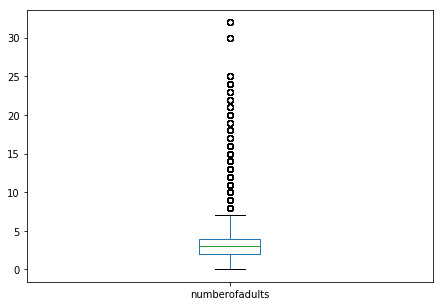

In [31]:
#boxplots for number of adults
plt.subplot(122) 
df_train['numberofadults'].plot.box(figsize=(16,5)) 
plt.show()

In [32]:
#numberofchildren   
#binnin will do
df_train['numberofchildren'].value_counts()

0     264250
1      37766
2      35164
3       2137
4       1658
6        187
5        181
8         44
7         20
10        14
12         2
13         1
Name: numberofchildren, dtype: int64

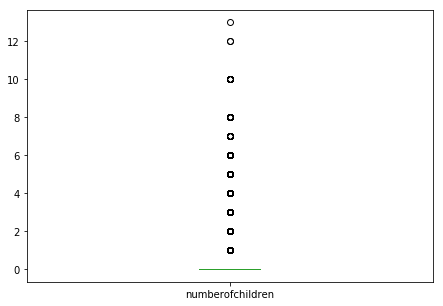

In [33]:
#boxplots for number of adults
plt.subplot(121) 
df_train['numberofchildren'].plot.box(figsize=(16,5)) 
plt.show()

In [34]:
#persontravellingid must be converted to categorical variable
#may be binning might work
df_train['persontravellingid'].value_counts()



45      267307
47       31580
46       30569
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

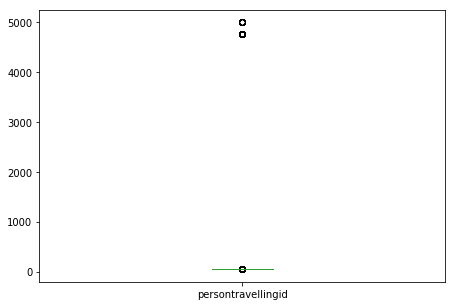

In [35]:
#boxplots for person travelling
plt.subplot(121) 
df_train['persontravellingid'].plot.box(figsize=(16,5)) 
plt.show()

In [36]:
#resort_region_code convert to categorical
df_train['resort_region_code'].value_counts()

1    143790
2    131361
3     66273
Name: resort_region_code, dtype: int64

In [0]:
#resort_type_code  convert to categorical
df_train['resort_type_code'].value_counts()

1    154324
2     74154
3     48681
5     26706
4     21619
7     11478
0      4462
Name: resort_type_code, dtype: int64

In [37]:
#room_type_booked_code    turn to categorical
df_train['room_type_booked_code'].value_counts()

3    137439
2    113459
4     83554
1      5374
5      1588
6        10
Name: room_type_booked_code, dtype: int64

In [38]:
#roomnights   
df_train['roomnights'].value_counts()

 3     94256
 2     85105
 4     58487
 6     36932
 1     25777
 5     12303
 8     10716
 9      5107
 12     3546
 10     2912
 7      2883
 15      805
 16      592
 14      496
 11      322
 18      312
 20      215
 13      119
 21       93
 24       89
 17       59
 30       57
 28       50
 27       27
 19       27
 23       19
 22       15
 25       15
 36       12
 31       12
 26       11
 32        9
 35        8
 47        6
 29        5
 34        5
 37        5
 39        5
 42        4
 33        2
-45        1
 60        1
 41        1
 0         1
Name: roomnights, dtype: int64

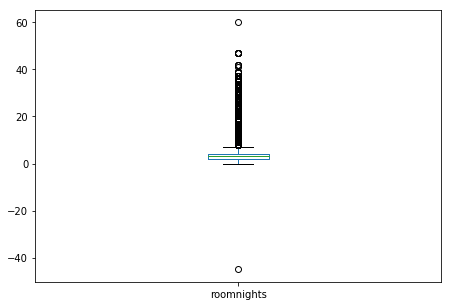

In [39]:
#boxplots for roonights   binning would be ok
plt.subplot(121) 
df_train['roomnights'].plot.box(figsize=(16,5)) 
plt.show()

In [40]:
#season_holidayed_code  re categorized
df_train['season_holidayed_code'].value_counts()

2.0    126771
3.0    118187
4.0     69387
1.0     26965
Name: season_holidayed_code, dtype: int64

In [41]:
#state_code_residence  manually group the state code to three groups(1-10,11-20,21-30)
#find out the state code distribution in india and grouped rich,poor (less populated,moderate,highly pop)
df_train['state_code_residence'].value_counts()

8.0     134919
2.0      41143
1.0      28040
7.0      25873
5.0      21051
4.0      15938
9.0      12291
15.0      9490
10.0      9356
6.0       6384
12.0      6092
3.0       3943
23.0      3835
14.0      3132
16.0      2371
13.0      1771
21.0      1694
20.0      1470
18.0      1429
19.0      1085
26.0      1068
25.0       840
27.0       790
11.0       713
28.0       541
22.0       432
24.0       382
30.0       144
29.0       101
33.0        88
31.0        60
37.0        59
32.0        53
34.0        48
35.0        16
36.0        12
38.0         6
Name: state_code_residence, dtype: int64

In [42]:
#state_code_resort  regrouping
df_train['state_code_resort'].value_counts()

1     59830
2     55883
6     50869
7     37809
3     33489
5     32784
9     28115
11    18271
4     14820
10     5684
13     3870
Name: state_code_resort, dtype: int64

In [43]:
#total_pax
df_train['total_pax'].value_counts()

2     106046
3      98504
4      97386
5      20672
6       8350
1       5912
7       3102
8       1093
9        229
10        74
11        18
0         16
12        13
21         3
13         2
20         2
14         1
24         1
Name: total_pax, dtype: int64

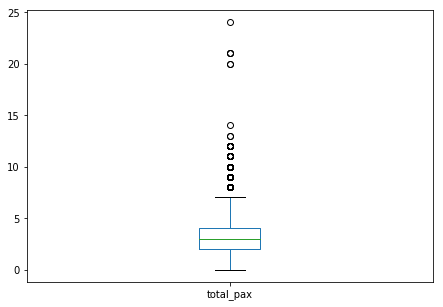

In [44]:
#boxplots for total pax   binning would be ok
plt.subplot(121) 
df_train['total_pax'].plot.box(figsize=(16,5)) 
plt.show()

In [51]:
#member_age_buckets 
df_train['member_age_buckets'].value_counts()

D    67618
E    66701
F    50967
C    45192
H    38548
G    36082
B    19430
I     8454
A     7054
J     1378
Name: member_age_buckets, dtype: int64

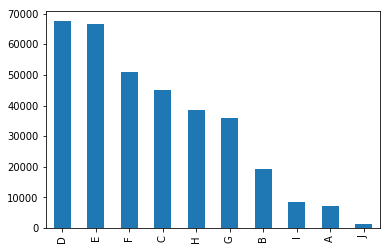

In [55]:
#bar chart
df_train['member_age_buckets'].value_counts().plot.bar()


TypeError: ignored

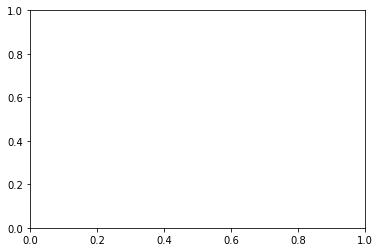

In [53]:
# let's plot a histogram with the fitted parameters used by the function
sns.distplot(df_train['member_age_buckets'] , fit=norm);
# get mean and standard deviation
(mu, sigma) = norm.fit(df_train['member_age_buckets'])
# add legends to the plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount');

In [56]:
#booking_type_code 
df_train['booking_type_code'].value_counts()

1    299016
2     42408
Name: booking_type_code, dtype: int64

In [61]:
#memberid  convert each to c001,c002 etc i feel member id should be removed
df_train['memberid'].value_counts()

81c5295dd0cd56d704882cd28c7c815658ba5796165b7d14dd39a6f4d5ee2842    50
b1ba17419ef0fe85c84ead7d792c14259cafc0c779dcd9020dd1cb5970904589    43
4b2282462a55d114c539fc2d7035507df514aadd4ad4ac9f721aee4472bcff84    39
3850b3f22326a2bbfa4a1f66bb8b97f7b7271e8e3b2e8bbee0450eb94f8d4d2e    38
c54eea7870f04d9debcf0610c215bfb289cec84313f348ac922a620ca00a38b1    36
414ace28c0600af09062d95884b967f9f5b4dbfd053ab1d9eca945666f960938    34
401a27f9857539faa08e458fe29dca243e3acadb09eb0e6330f428b242101347    32
0ce15be2f5db26bbfcc49d47a09693b230ab174fbba3e3d3130295b0d6e2f13d    31
3cb55e19294eda149f9476b2dafeb79387ae4c427ab33fb9c324f0eb59754ed0    30
c213885d8e4f1618852ec83ef265d6bc9e37519c12aeddcb3d0b428e8f21c492    30
f63775a07ba989842ed595e4835086c9777cccbe60c304b804ca23074dc53da9    29
4b1a2fb2e500cd96c2c491208c945dc4b85214e7485961a826f52fa92dff700a    28
5372658e62728dd1aefbf9e76ce96f9244eb37bb2db8212f9964947f04791af5    27
28d69ebf944817402c184076b471daa4654dd3649101181e3ad34bcdded847d0    27
83f39a

In [63]:
df_train['memberid'].tail()

341419    0095e00c6dae789d37628bd85697e53c423231337994c4...
341420    42d7b97ad0d345da57a4010157729286418481f3d7ad24...
341421    f393011a27daf3d1676417f48f44ad9ed3541285e71209...
341422    b14649c29eb050f4e9b69c7a3afb5dfa00d12dabfd2e40...
341423    2a3936f649eb6af2167f41fb6f0cc9f352d142125f402f...
Name: memberid, dtype: object

In [64]:
#cluster_code
df_train['cluster_code'].value_counts()

F    120623
E     59830
D     55883
C     37809
B     37669
A     29610
Name: cluster_code, dtype: int64

In [65]:
#reservationstatusid_code
df_train['reservationstatusid_code'].value_counts()

A    312481
B     14811
C     14131
D         1
Name: reservationstatusid_code, dtype: int64

In [66]:
#resort_id
df_train['resort_id'].value_counts() #i feel this should be removed

d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35    35331
b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9    28864
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767    22344
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    22005
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6    19001
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b    18780
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b    18271
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c    15465
624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4    12175
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683    12074
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a    12065
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a    11478
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4    10621
535fa30d7e25dd8a49f1536779734ec8286108

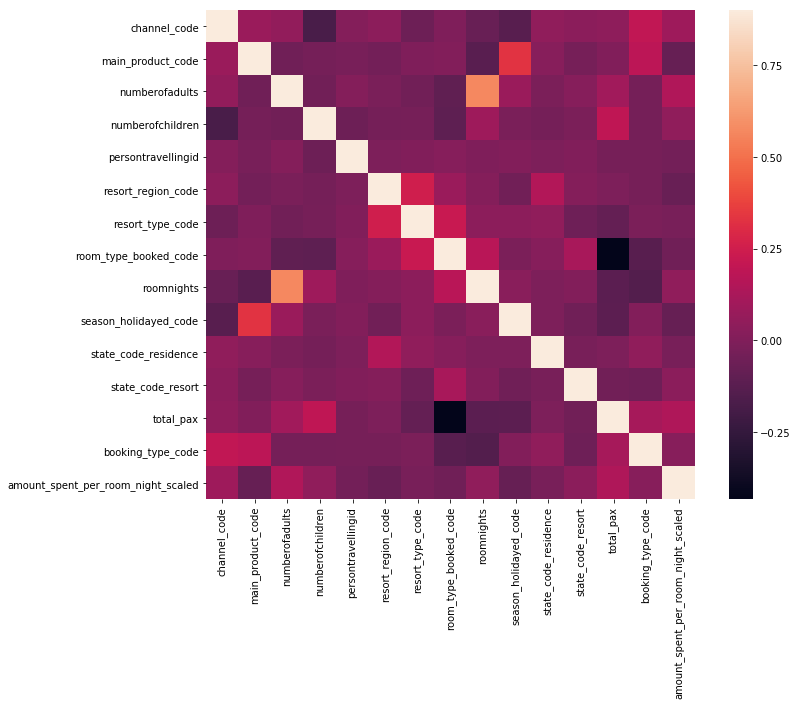

In [48]:
#Correlation map to see how features are correlated with SalePrice
corrmat =train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True);